In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf



In [2]:
## 1. 讀入 MNSIT 數據集


In [3]:
from tensorflow.keras.datasets import fashion_mnist


In [4]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data() #x是圖片 y是數值

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

In [7]:
len(y_test)

10000

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
##資料整理


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train=x_train/255
x_test=x_test/255

x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)



In [14]:
from tensorflow.keras.utils import to_categorical  ##將向量轉為二進位制

In [15]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [16]:
y_train[22]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
##打造神經網路

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
model = Sequential()

In [22]:
model.add(Dense(100, input_dim=784, activation='relu')) #3個隱藏層    #設定神經元數量=100
model.add(Dense(100, activation='relu'))                #設定神經元數量=100
model.add(Dense(10,activation='softmax'))               #因為輸出有十種結果 所以神經元數量=10
          

In [23]:
model.compile(loss='mse',optimizer=SGD(lr=0.06), metrics=['accuracy'])  #損失函數使用mse lr=0.06

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=20)          #批量訓練每次100筆資料 訓練20次

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0223 - accuracy: 0.8493
Epoch 2/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0221 - accuracy: 0.8510
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0220 - accuracy: 0.8522
Epoch 4/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0217 - accuracy: 0.8537
Epoch 5/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0216 - accuracy: 0.8555
Epoch 6/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0214 - accuracy: 0.8570
Epoch 7/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0213 - accuracy: 0.8573
Epoch 8/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0211 - accuracy: 0.8583
Epoch 9/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0210 - accuracy: 0.8592
Epoch 10/20
60

In [27]:
result= model.predict_classes(x_test)

This is a T-shirt/top


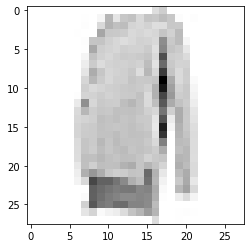

In [45]:
n=66
print('This is a',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')


In [39]:
model2=Sequential()

In [43]:
model2.add(Dense(126, input_dim=784, activation='relu')) 
model2.add(Dense(50, activation='relu'))                
model2.add(Dense(10,activation='softmax')) 
model2.compile(loss='mse',optimizer=SGD(lr=0.06), metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 126)               98910     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 126)               1386      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                6350      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 120,866
Trainable params: 120,866
Non-trainable params: 0
________________________________________________

In [44]:
model2.fit(x_train, y_train, batch_size=1000, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0901 - accuracy: 0.0195
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0899 - accuracy: 0.0216
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0897 - accuracy: 0.0243
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0895 - accuracy: 0.0288s - loss: 0.0895 - accuracy: 0.02
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0894 - accuracy: 0.0386
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0892 - accuracy: 0.1440
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0890 - accuracy: 0.2170
Epoch 8/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0888 - accuracy: 0.2808
Epoch 9/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0887 

In [ ]:
於第一組model中，設了3個隱藏層，分別有100,100,10個神經元，並以0.08的學習率去訓練，最後得出的正確率為0.8677
而第二組model2中，設了5個隱藏層，而正確率卻只剩0.5724